In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
# Import data

def load_data():
    url = 'https://raw.githubusercontent.com/rfordatascience/' + \
    'tidytuesday/master/data/2020/2020-07-07/coffee_ratings.csv'
    df = pd.read_csv(url)
    df_interim = df.copy()
    df_interim = df_interim[['total_cup_points',
                                'species',
                                'country_of_origin',
                                'variety',
                                'aroma',
                                'aftertaste',
                                'acidity',
                                'body',
                                'balance',
                                'sweetness',
                                'altitude_mean_meters',
                                'moisture']]
    df_interim = df_interim.dropna()
    df_interim['species'] = pd.Categorical(df_interim['species'])
    df_interim['country_of_origin'] = pd.Categorical(df_interim['country_of_origin'])
    df_interim['variety'] = pd.Categorical(df_interim['variety'])
    df_interim['specialty'] = df_interim['total_cup_points'].apply(lambda x: 'yes' if x>82.43 else 'no')
    df_interim['specialty'] = pd.Categorical(df_interim['specialty'])
    df_interim['altitude_mean_meters'] = df_interim['altitude_mean_meters'].apply(lambda x:1300 if x>10000 else x)
    df = df_interim.copy()

    return df

df_ch = load_data()

df_ch.info()

<class 'pandas.core.frame.DataFrame'>
Index: 997 entries, 1 to 1333
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   total_cup_points      997 non-null    float64 
 1   species               997 non-null    category
 2   country_of_origin     997 non-null    category
 3   variety               997 non-null    category
 4   aroma                 997 non-null    float64 
 5   aftertaste            997 non-null    float64 
 6   acidity               997 non-null    float64 
 7   body                  997 non-null    float64 
 8   balance               997 non-null    float64 
 9   sweetness             997 non-null    float64 
 10  altitude_mean_meters  997 non-null    float64 
 11  moisture              997 non-null    float64 
 12  specialty             997 non-null    category
dtypes: category(4), float64(9)
memory usage: 84.6 KB


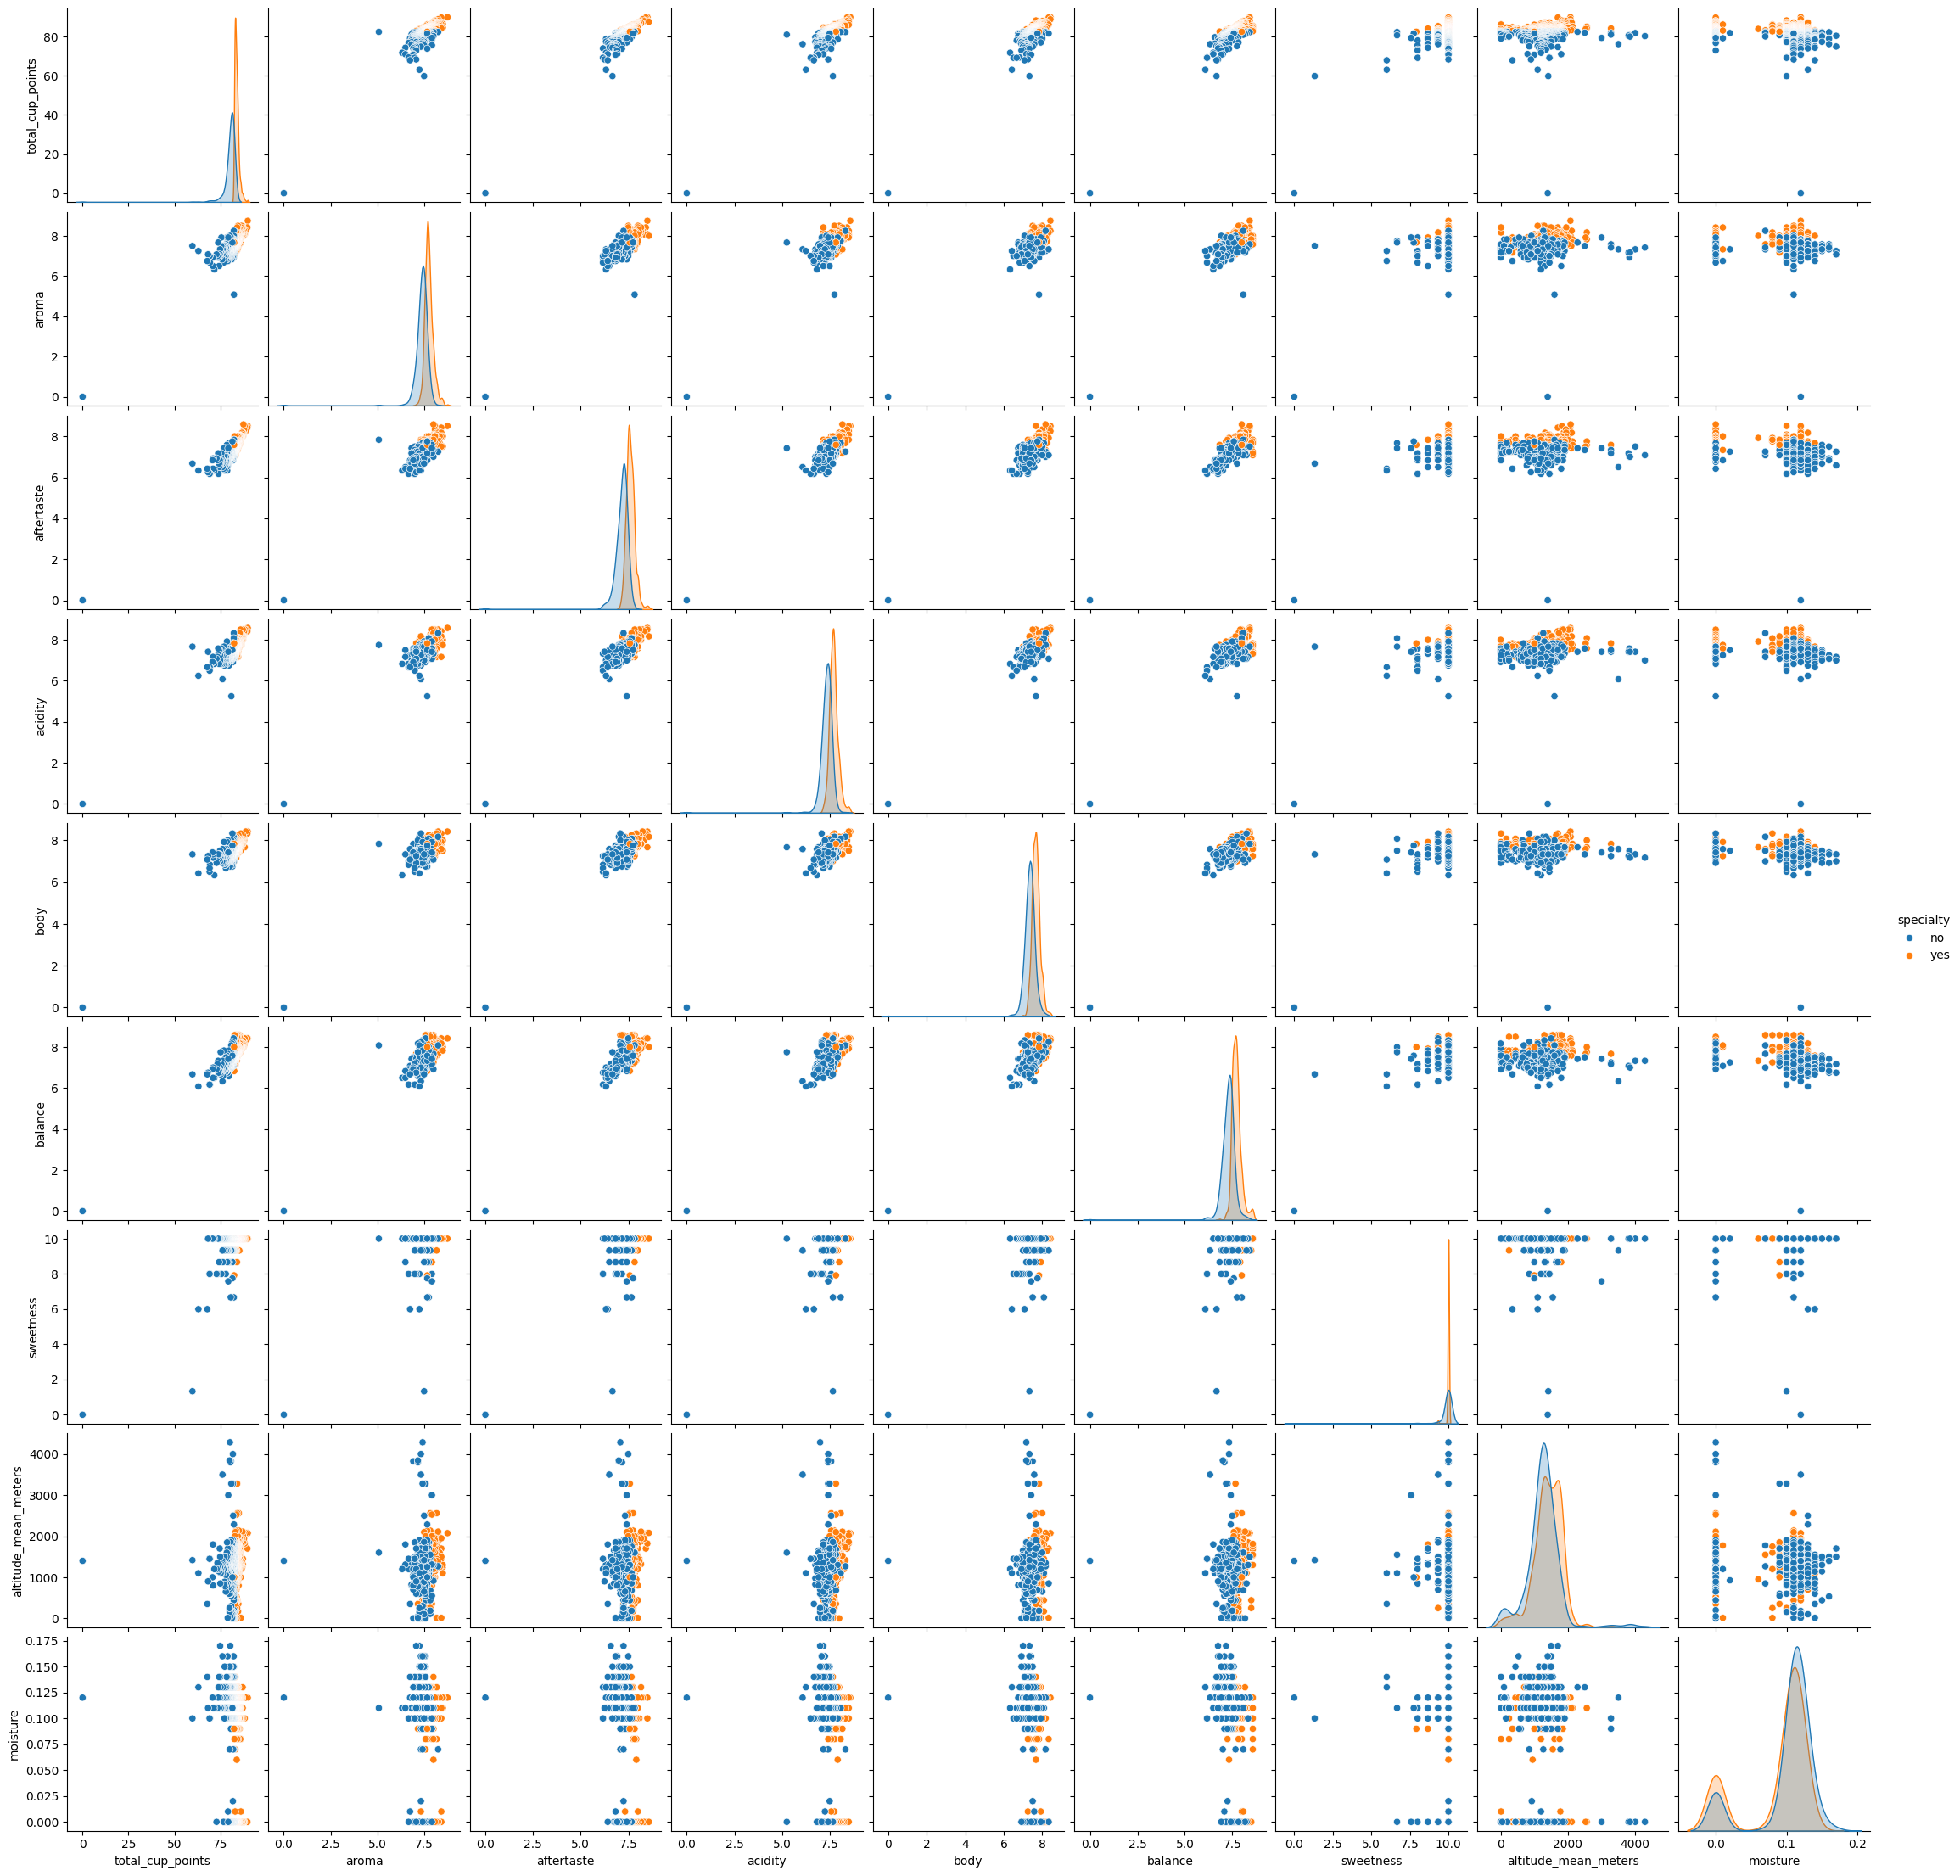

In [3]:
sns.pairplot(df_ch.drop(['species', 'country_of_origin', 'variety'], axis=1), hue='specialty')
plt.show()

In [4]:
df_ch.columns

Index(['total_cup_points', 'species', 'country_of_origin', 'variety', 'aroma',
       'aftertaste', 'acidity', 'body', 'balance', 'sweetness',
       'altitude_mean_meters', 'moisture', 'specialty'],
      dtype='object')

In [5]:
(df_ch.drop(['species', 'country_of_origin', 'variety'], axis=1)).describe().T

,count,mean,std,min,25%,50%,75%,max
total_cup_points,997.0,82.026078,3.688091,0.0,81.17,82.42,83.58,89.92
aroma,997.0,7.558877,0.384985,0.0,7.42,7.58,7.75,8.75
aftertaste,997.0,7.376399,0.404112,0.0,7.17,7.42,7.58,8.58
acidity,997.0,7.514654,0.384867,0.0,7.33,7.50,7.67,8.58
body,997.0,7.496369,0.359624,0.0,7.33,7.50,7.67,8.42
balance,997.0,7.491755,0.414074,0.0,7.33,7.50,7.67,8.58
sweetness,997.0,9.914915,0.541567,0.0,10.00,10.00,10.00,10.00
altitude_mean_meters,997.0,1323.822360,470.716605,1.0,1100.00,1310.64,1600.00,4287.00
moisture,997.0,0.093811,0.044326,0.0,0.10,0.11,0.12,0.17


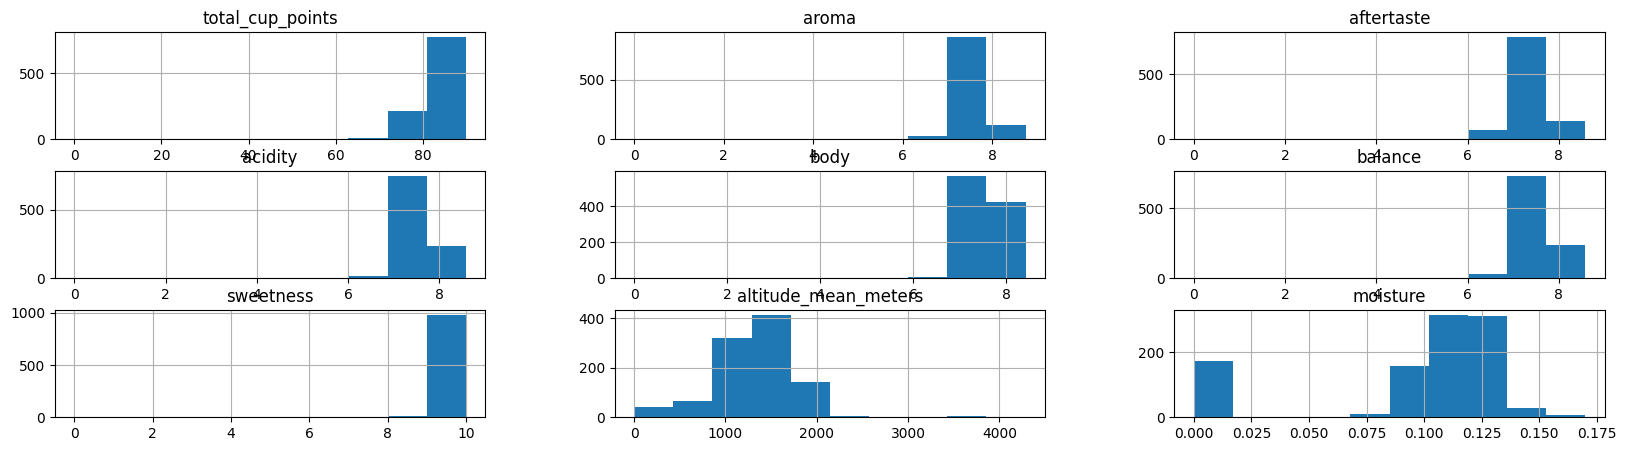

In [12]:
df_ch.hist(figsize=(20,5))
plt.show()

In [13]:
df_ch.select_dtypes(include='number').corr()

,total_cup_points,aroma,aftertaste,acidity,body,balance,sweetness,altitude_mean_meters,moisture
total_cup_points,1.000000,0.815080,0.890484,0.827985,0.819990,0.857230,0.671905,0.092558,-0.119093
aroma,0.815080,1.000000,0.791920,0.751131,0.728753,0.743140,0.407930,0.112274,-0.082848
aftertaste,0.890484,0.791920,1.000000,0.794828,0.796880,0.839381,0.450759,0.089013,-0.151322
acidity,0.827985,0.751131,0.794828,1.000000,0.766689,0.764255,0.426036,0.144771,-0.103852
body,0.819990,0.728753,0.796880,0.766689,1.000000,0.805983,0.426956,0.072249,-0.169316
balance,0.857230,0.743140,0.839381,0.764255,0.805983,1.000000,0.427948,0.080618,-0.199941
sweetness,0.671905,0.407930,0.450759,0.426036,0.426956,0.427948,1.000000,-0.000130,0.018333
altitude_mean_meters,0.092558,0.112274,0.089013,0.144771,0.072249,0.080618,-0.000130,1.000000,-0.047337
moisture,-0.119093,-0.082848,-0.151322,-0.103852,-0.169316,-0.199941,0.018333,-0.047337,1.000000


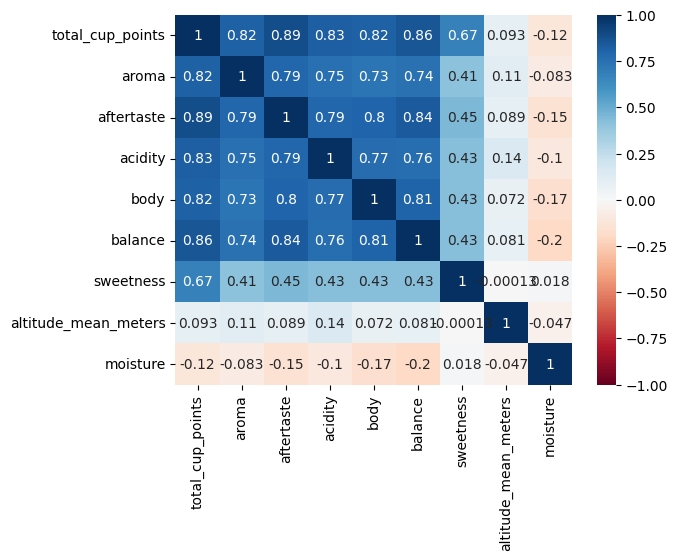

In [14]:
sns.heatmap(df_ch.select_dtypes(include='number').corr(), vmin=-1, vmax=1, annot=True, cmap='RdBu')
plt.show()

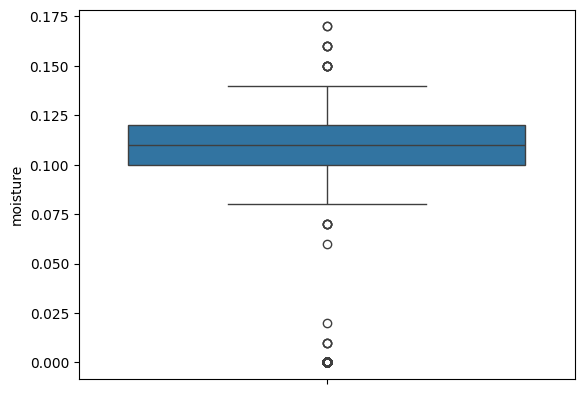

In [17]:
sns.boxplot(df_ch['moisture'])
plt.show()

In [18]:
df_ch.head()

,total_cup_points,species,country_of_origin,variety,aroma,aftertaste,acidity,body,balance,sweetness,altitude_mean_meters,moisture,specialty
1,89.92,Arabica,Ethiopia,Other,8.75,8.50,8.58,8.42,8.42,10.0,2075.0,0.12,yes
2,89.75,Arabica,Guatemala,Bourbon,8.42,8.42,8.42,8.33,8.42,10.0,1700.0,0.00,yes
4,88.83,Arabica,Ethiopia,Other,8.25,8.25,8.50,8.42,8.33,10.0,2075.0,0.12,yes
9,88.25,Arabica,Ethiopia,Other,8.08,8.50,8.50,7.67,8.42,10.0,1822.5,0.10,yes
11,87.92,Arabica,United States,Other,8.25,8.17,8.33,8.08,8.17,10.0,1872.0,0.00,yes
